# Movielens Data Exploration

### <a id='1234'>Contents</a>
- <a href='#0'>Libraries</a>
- <a href='#1'>1. Data</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Rating Data</a>
    - <a href='#2.2'>2.2. User Data</a>
    - <a href='#2.3'>2.3. Movie Data</a>
    - <a href='#2.4'>2.4. Leaveraging multiple data sources</a>

## <a id='0'>Libraries</a>       
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## <a id='1'>1.Data</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

Data is available from https://grouplens.org/datasets/movielens/1m/. Please download and store in the directory mentioned below. As per the usage license redistribution of data is not allowed.

In [2]:
data_dir = '../data/'
# data format in rating file: UserID::MovieID::Rating::Timestamp
rating_file = data_dir + 'ratings.dat' 
# data format in user file: UserID::Gender::Age::Occupation::Zip-code
user_file = data_dir + 'users.dat'
# data format in movie file: MovieID::Title::Genres
movie_file = data_dir + 'movies.dat'

In [3]:
# loding the data to dataframes
df_rating = pd.read_csv(rating_file, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_user = pd.read_csv(user_file, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
df_movie = pd.read_csv(movie_file, sep='::', header=None, names=['movie_id', 'title', 'genre'])

In [4]:
# Age group dictionary retrieved from dataset description
age_group_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [5]:
# Occupation dictionary retrieved from dataset description
occupation_dict = {
    0:  "other or not specified",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

## <a id='2'>2. Exploratory Data Analysis</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>



In this section, first we will individually explore each data sources. Then we leverage contents from all the data sources to get insights.

### <a id='2.1'>2.1. Rating Data</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

First of all let's look at first few entries from rating data

In [6]:
df_rating.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Let's look at the some more details of this dataframe

In [7]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


There are more than 1M user ratings with 4 attributes: user id, movie id, rating and timestamp. The timestamp column is detected as integer. We can convert it to timestamp type and extract year and month and sort the records by timestamp.

In [8]:
df_rating['timestamp'] = df_rating['timestamp'].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['date'] = df_rating['timestamp'].dt.date
df_rating = df_rating.sort_values('timestamp').reset_index(drop=True)

Now, let's print the few of the first and last rows of the modified rating datframe.

In [9]:
df_rating.head()

,user_id,movie_id,rating,timestamp,year,month,date
0,6040,858,4,2000-04-26 01:05:32,2000,4,2000-04-26
1,6040,2384,4,2000-04-26 01:05:54,2000,4,2000-04-26
2,6040,593,5,2000-04-26 01:05:54,2000,4,2000-04-26
3,6040,1961,4,2000-04-26 01:06:17,2000,4,2000-04-26
4,6040,2019,5,2000-04-26 01:06:17,2000,4,2000-04-26


In [10]:
df_rating.tail()

,user_id,movie_id,rating,timestamp,year,month,date
1000204,4958,2399,1,2003-02-28 18:45:38,2003,2,2003-02-28
1000205,4958,1407,5,2003-02-28 18:47:23,2003,2,2003-02-28
1000206,4958,3264,4,2003-02-28 18:49:08,2003,2,2003-02-28
1000207,4958,2634,3,2003-02-28 18:49:08,2003,2,2003-02-28
1000208,4958,1924,4,2003-02-28 18:49:50,2003,2,2003-02-28


Let's explore some more statistics from the modified dataframe.

In [11]:
print('Years:', df_rating.year.unique())
print('Months', df_rating.month.unique())
print('#Unique users:', df_rating.user_id.nunique())
print('#Unique movies:', df_rating.movie_id.nunique())
print('Unique ratings:', df_rating.rating.unique())
print('Average rating:', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:')
print(df_rating['rating'].value_counts())

Years: [2000 2001 2002 2003]
Months [ 4  5  6  7  8  9 10 11 12  1  2  3]
#Unique users: 6040
#Unique movies: 3706
Unique ratings: [4 5 3 2 1]
Average rating: 3.58
Frequency of each rating value:
4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64


We can see that data is from the duration: April 2000 to Febrary 2003<br>
There are 6040 unique users rated 3706 movies in total.<br>
The rating values are ranging from 1 to 5. 
The average rating is around 3.6 and most frequent rating value is 4.

Now, let's see how the number of ratings for each year.

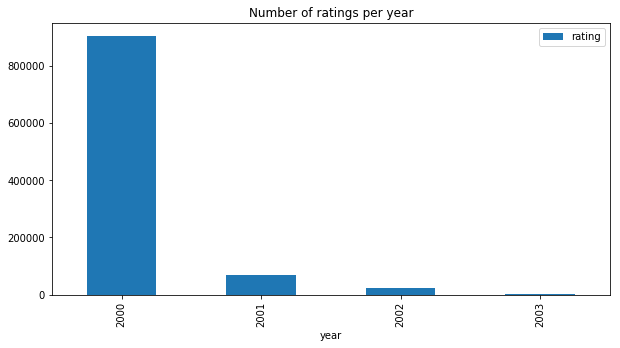

In [12]:
df_rating[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

We can see that most number of ratings are available for the year 2000(approximately 900k, which is equivalent to around 90% of the data points). Now have a look at the average monthly distribution of rating.

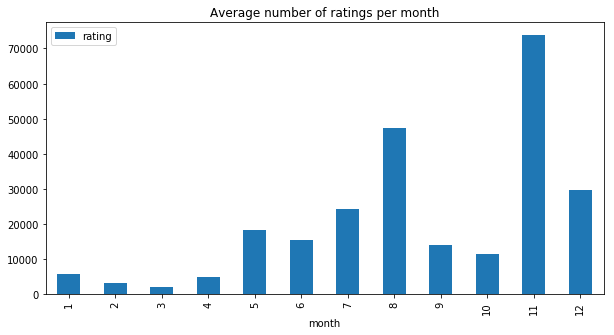

In [13]:
df_temp = df_rating[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 4
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

It is observed that 11th month of the year(November) is having highest average number of the ratings(approximately 70k) followed by August(approximately 50k) and December(30k). Again this value are approximate as we have only 2 months data available for the year 2003.<br>
Now, let's have a look at the monthly total number of ratings each year.

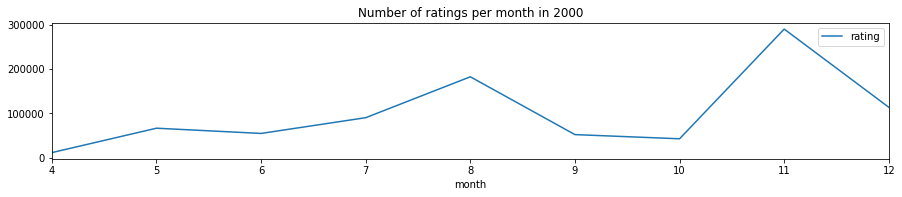

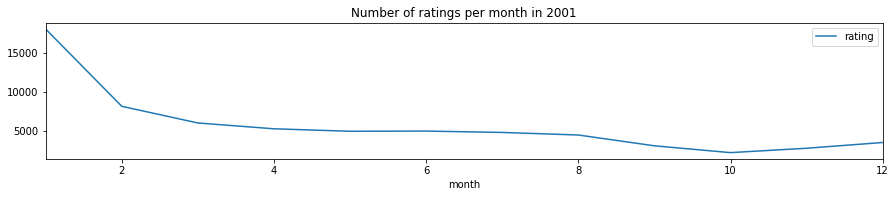

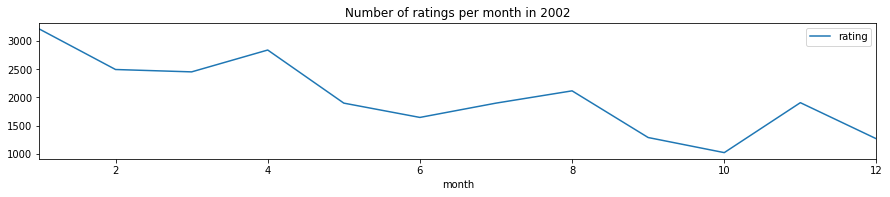

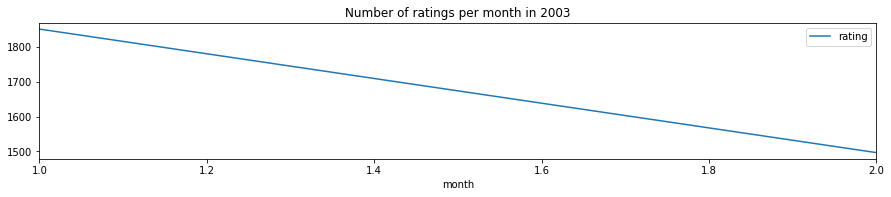

In [14]:
df_temp = df_rating[['year', 'month', 'rating']].groupby(['year', 'month']).count().reset_index()
for year in df_temp['year'].unique():
    df_temp.loc[df_temp['year'] == year].plot('month', 'rating', title='Number of ratings per month in %s' %year, figsize=(15, 2.5))

For 2000, we can see that there are high number of ratings in the month of November. As around 90% of ratings are available from this year, we can see that this influenced the monthly highest average ratings we observerd for the month November(also for August and December) in the previous graph. For the years 2001 and 2002 we can see a negative trend. Since we have only 2 months data availabel for 2003, can't make any conclusion on this aspect.<br>

Now let's see the distribution of different rating values. This will give an idea of common rating behaviour of users.

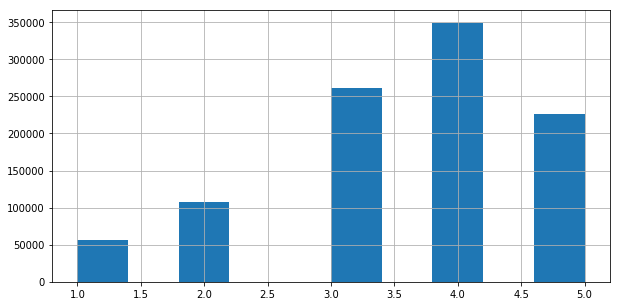

In [15]:
df_rating['rating'].hist(figsize=(10, 5));

We can see that most common rating value is 4 with an approximate count of 350k. As we have 1M ratings we can say that around 35% of ratings are of value 4 followed by approximately 26% and 21% respectively for 3 and 5.  Since we have only two months data available for year 2003, these calculation is not fully accurate. But We can can see that most of the people give rating around 4.<br> 
We can also plot similar plot for each year.

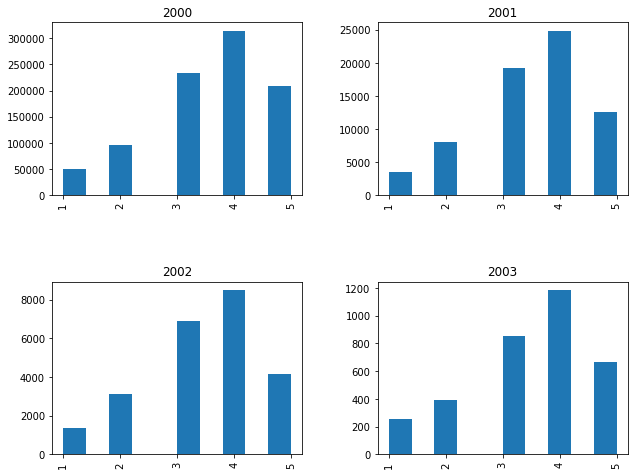

In [16]:
df_rating['rating'].hist(by=df_rating['year'], figsize=(10, 8));

We can observe similar distributions for each year. Now, we can also have a look the rating value distribution per month.

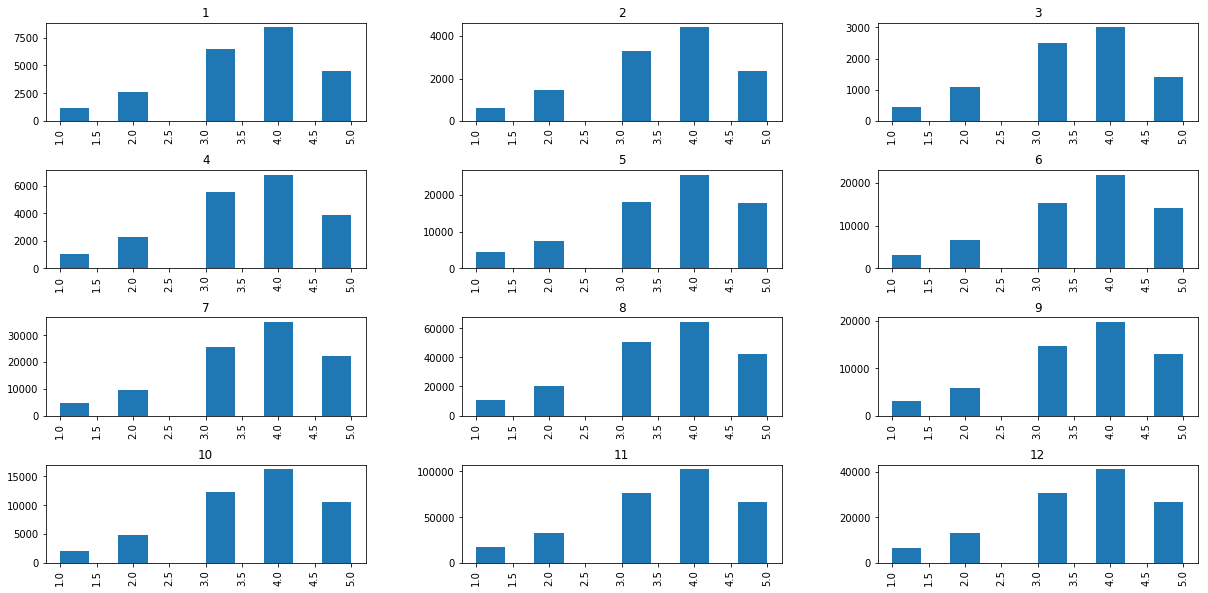

In [17]:
df_rating['rating'].hist(by=df_rating['month'], figsize=(20, 10));

We can see similar distribution as we already observed in the overall and yearly graphs.<br>
we have seen that the overall rating average is approximately 3.6. Now let's look how the ratings change over time. we can also plot lower and upper bounds using standard deviation.

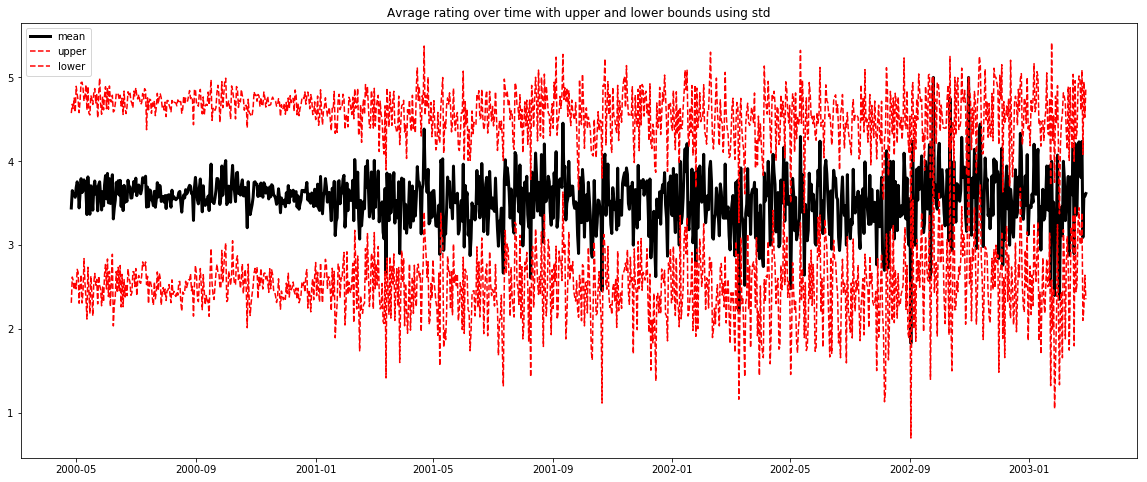

In [18]:
df_temp = df_rating.groupby(['date'])['rating'].agg([np.mean, np.std]).reset_index()
df_temp['upper'] = df_temp['mean'] + df_temp['std']
df_temp['lower'] = df_temp['mean'] - df_temp['std']
plt.figure(figsize=(20,8)) 
plt.plot(df_temp['date'], df_temp['mean'], color="black", linewidth=3.0)
plt.plot(df_temp['date'], df_temp['upper'], color="red", linestyle='--')
plt.plot(df_temp['date'], df_temp['lower'], color="red", linestyle='--')
plt.title('Avrage rating over time with upper and lower bounds using std')
plt.legend()
plt.show()

We can see that the average rating lies between 3 and 4 over the time.

Now let's focus on the users. We have seen that there are 6040 unique users. Let's see top 10 users based on number of ratings.

In [19]:
df_rating['user_id'].value_counts().nlargest(n=10)

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: user_id, dtype: int64

In [20]:
type(df_rating['user_id'].value_counts())

pandas.core.series.Series

We can see that user with id 4169 is the top users with 2314 ratings. We can see the distribution of number of reviews per user using box plot and histogram.

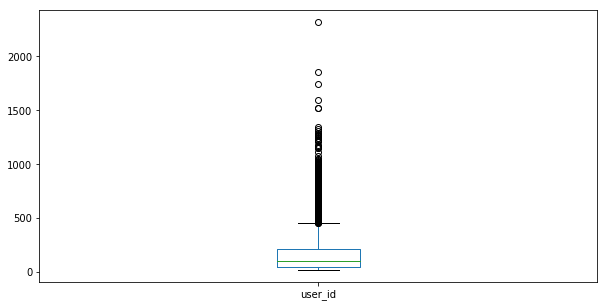

In [21]:
df_rating['user_id'].value_counts().plot.box(figsize=(10, 5));

We can see that median is around 100. We can users with number of reviews more than extreme value(approximately 500).

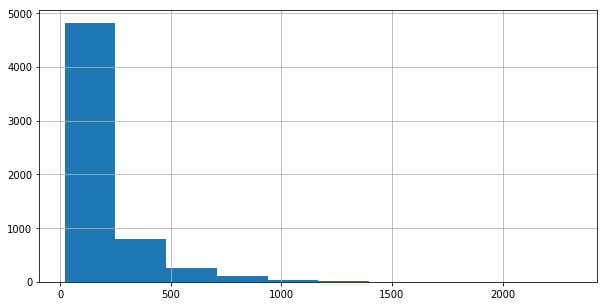

In [22]:
df_rating['user_id'].value_counts().hist(figsize=(10, 5));

From the histogram we can observe that most of the people(around 4900) are having number of reviews in the range of 1 to 250. Around 900 people are having 250-500 reviews. 250-300(approximate) people are having more than 500 reviews.

Let's now see distribution of unique users per year.

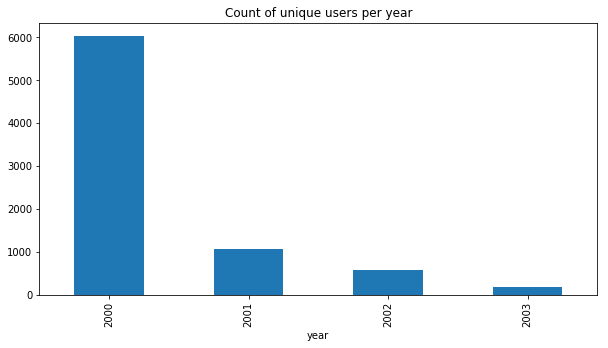

In [23]:
df_rating[['year', 'user_id']].groupby(['year'])['user_id'].nunique().plot.bar(x='year', y='user_id', title='Count of unique users per year', figsize=(10, 5));

we can also check newly added users in consecutive years.<br>

Let's now explore about movies. We have seen that there are 3706 unique movies having ratings. 

Let's see top 10 movies based on number of reviews.

In [24]:
df_rating['movie_id'].value_counts().nlargest(n=10)

2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: movie_id, dtype: int64

Movie with id 2815 is having more number of reviews. Now let's see the distribution of number of reviews.

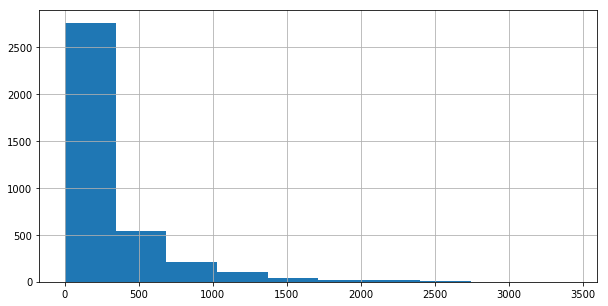

In [25]:
df_rating['movie_id'].value_counts().hist(figsize=(10, 5));

We can observe that approximately 3000(90%) of movies having number of reviews in the range of 1-300. Rest of the movies are having more than 500(approximate) reviews.

### <a id='2.2'>2.2. User Data</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>


First of all let's look at first few entries from users data

In [26]:
df_user.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [27]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


There are 6040 users with 5 attributes.

In [28]:
print('#Unique occupation:', df_user.occupation.nunique())
print('#Unique zipcodes:', df_user.zipcode.nunique())
print('Gender distribution:\n', df_user['gender'].value_counts())

#Unique occupation: 21
#Unique zipcodes: 3439
Gender distribution:
 M    4331
F    1709
Name: gender, dtype: int64


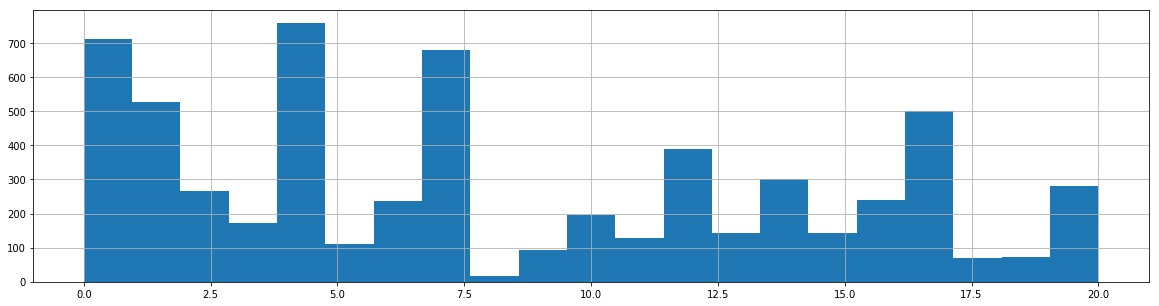

In [29]:
df_user['occupation'].hist(bins=21, figsize=(20, 5));

We can see that there are 3 usergroups(based on occupation) having approximately 700 users, 2 having 500 and so on.

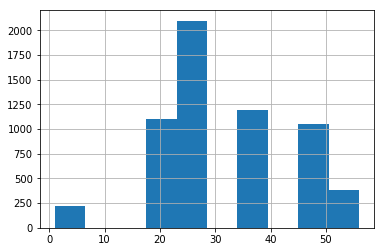

In [30]:
df_user['age'].hist();

We can see that most of the users(approximately 2000) belongs to the age group of 25-34(see the age group dictionary). There are approximately 1000 people belongs to age groups 18-24, 35-44 and 45-49.

### <a id='2.3'>2.3. Movie Data</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

First of all let's look at first few entries from users data

In [31]:
df_movie.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


We can see that the year of release is appended to the the tile column. We can split it and create a new column called release_year.

In [32]:
df_movie['release_year'] = df_movie.title.str.extract("\((\d{4})\)", expand=True).astype(str)

In [33]:
df_movie['release_year'] = pd.to_datetime(df_movie.release_year, format='%Y')
df_movie['release_year'] = df_movie.release_year.dt.year
df_movie['title'] = df_movie.title.str[:-7]

In [34]:
# Printing unique genres. This is also given in the dataset description file
genres_unique = pd.DataFrame(df_movie.genre.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

Unique genres ['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


Creating dummy column for each column with boolean values

In [35]:
df_movie = df_movie.join(df_movie.genre.str.get_dummies().astype(bool))
df_movie.drop('genre', inplace=True, axis=1)

In [36]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
movie_id        3883 non-null int64
title           3883 non-null object
release_year    3883 non-null int64
Action          3883 non-null bool
Adventure       3883 non-null bool
Animation       3883 non-null bool
Children's      3883 non-null bool
Comedy          3883 non-null bool
Crime           3883 non-null bool
Documentary     3883 non-null bool
Drama           3883 non-null bool
Fantasy         3883 non-null bool
Film-Noir       3883 non-null bool
Horror          3883 non-null bool
Musical         3883 non-null bool
Mystery         3883 non-null bool
Romance         3883 non-null bool
Sci-Fi          3883 non-null bool
Thriller        3883 non-null bool
War             3883 non-null bool
Western         3883 non-null bool
dtypes: bool(18), int64(2), object(1)
memory usage: 159.3+ KB


In [37]:
df_movie.head()

,movie_id,title,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
print('#Unique movie release years:', df_movie.release_year.nunique())

#Unique movie release years: 81


In [39]:
temp = df_movie.release_year.unique()
temp.sort()
print(temp)

[1919 1920 1921 1922 1923 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000]


We can see that there are details of 3883 movies with release years from 1919 to 2000.

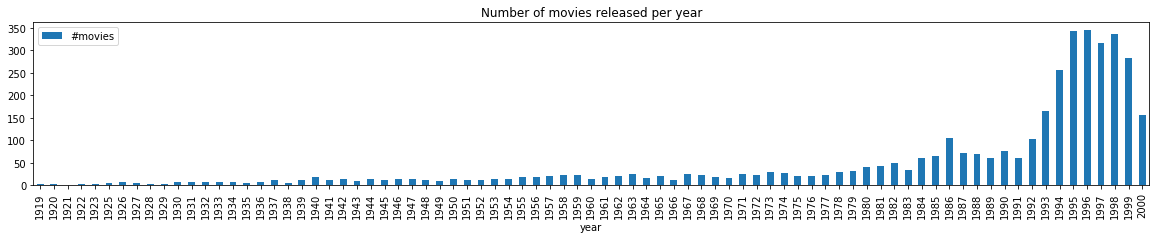

In [40]:
df_temp = df_movie[['release_year', 'movie_id']].groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
df_temp.plot.bar('year', '#movies', title='Number of movies released per year', figsize=(20, 3));

We can see that most of the movies released in the dataset during 90s.

Now, let's have a look at the trend of different genres over the years

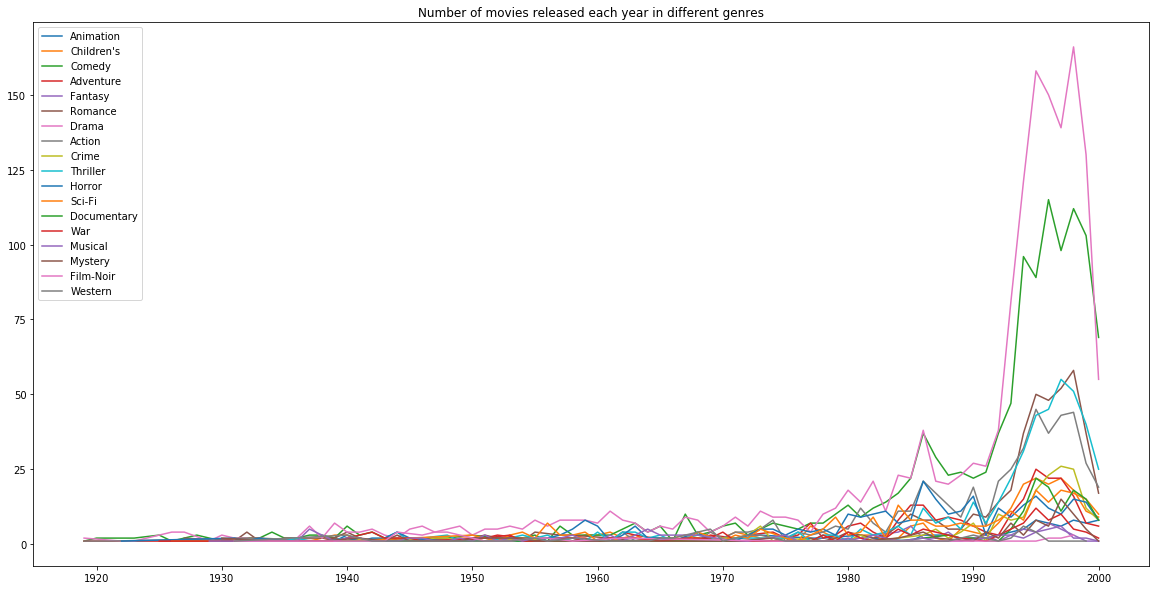

In [41]:
plt.figure(figsize=(20,10)) 
for genre in genres_unique.genre:
    df_temp = df_movie[df_movie[genre]==True][['release_year', 'movie_id']]
    df_temp = df_temp.groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
    plt.plot(df_temp['year'], df_temp['#movies'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

We can see that there was huge hype for Film-Noir and comdy genre type in late 90s.

### <a id='2.4'>2.4. Leaveraging multiple data sources</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

Adding movies and user data to rating data

In [42]:
df_temp = df_rating.merge(df_movie, left_on='movie_id', right_on='movie_id', how='left')
df_final = df_temp.merge(df_user, left_on='user_id', right_on='user_id', how='left')
df_final.head()

,user_id,movie_id,rating,timestamp,year,month,date,title,release_year,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,age,occupation,zipcode
0,6040,858,4,2000-04-26 01:05:32,2000,4,2000-04-26,"Godfather, The",1972,True,...,False,False,False,False,False,False,M,25,6,11106
1,6040,2384,4,2000-04-26 01:05:54,2000,4,2000-04-26,Babe: Pig in the City,1998,False,...,False,False,False,False,False,False,M,25,6,11106
2,6040,593,5,2000-04-26 01:05:54,2000,4,2000-04-26,"Silence of the Lambs, The",1991,False,...,False,False,False,True,False,False,M,25,6,11106
3,6040,1961,4,2000-04-26 01:06:17,2000,4,2000-04-26,Rain Man,1988,False,...,False,False,False,False,False,False,M,25,6,11106
4,6040,2019,5,2000-04-26 01:06:17,2000,4,2000-04-26,Seven Samurai (The Magnificent Seven) (Shichin...,1954,True,...,False,False,False,False,False,False,M,25,6,11106


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 31 columns):
user_id         1000209 non-null int64
movie_id        1000209 non-null int64
rating          1000209 non-null int64
timestamp       1000209 non-null datetime64[ns]
year            1000209 non-null int64
month           1000209 non-null int64
date            1000209 non-null object
title           1000209 non-null object
release_year    1000209 non-null int64
Action          1000209 non-null bool
Adventure       1000209 non-null bool
Animation       1000209 non-null bool
Children's      1000209 non-null bool
Comedy          1000209 non-null bool
Crime           1000209 non-null bool
Documentary     1000209 non-null bool
Drama           1000209 non-null bool
Fantasy         1000209 non-null bool
Film-Noir       1000209 non-null bool
Horror          1000209 non-null bool
Musical         1000209 non-null bool
Mystery         1000209 non-null bool
Romance         1000209 non-nul

Let's see the number of movies in each genre.

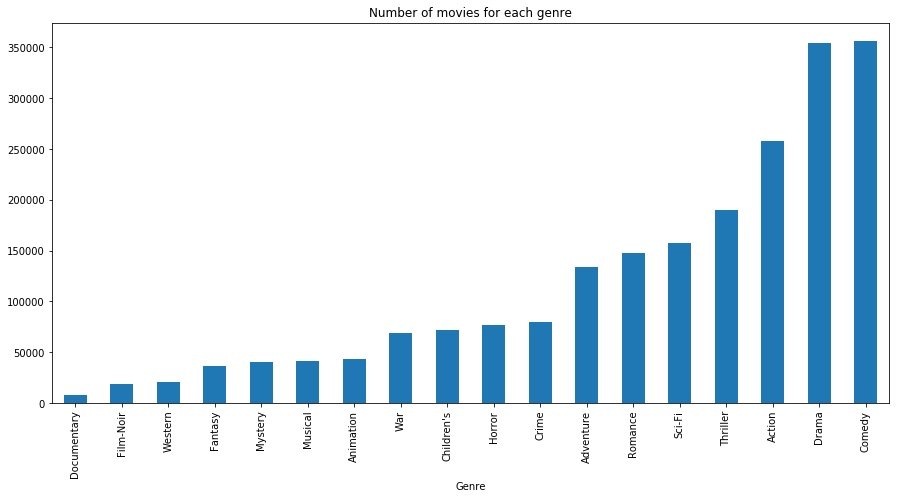

In [44]:
df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
for genre in genres_unique.genre:
    row = [genre, df_final[df_final[genre]==True][['movie_id']].count()]
    df_temp.loc[len(df_temp)] = row
df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
df_temp = df_temp.sort_values('num_movies', ascending=True).set_index('genre')
plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,7))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre');

We can see that the comedy drama are having very high number of movies followed by Action and Thriller. We can also have a look at how the trend(based on number of rating) of each genre changes over time.

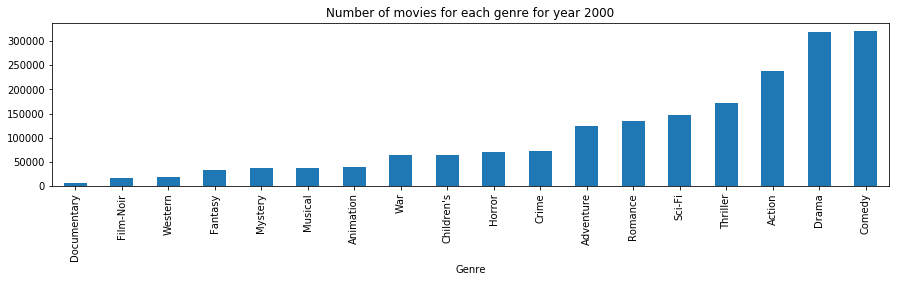

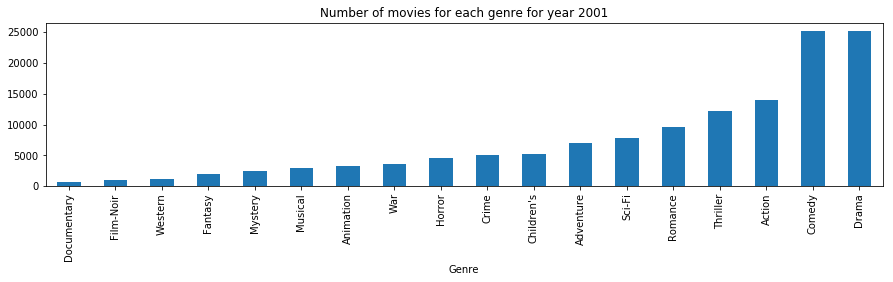

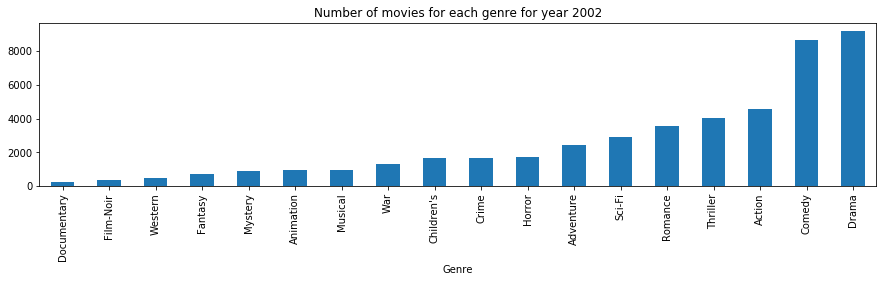

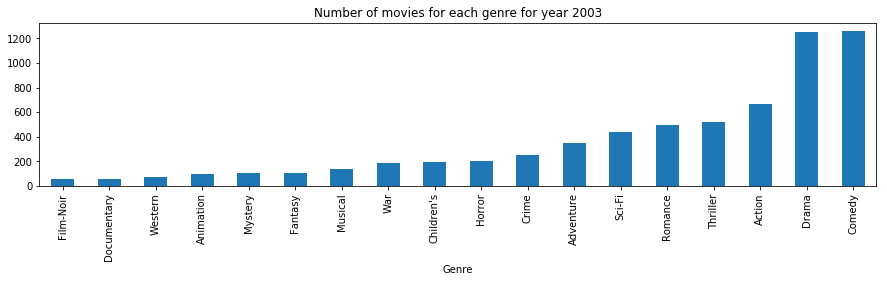

In [45]:
for year in df_final['year'].unique():
    df_year = df_final[df_final['year']==year]
    df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
    for genre in genres_unique.genre:
        row = [genre, df_year[df_year[genre]==True][['movie_id']].count()]
        df_temp.loc[len(df_temp)] = row
    df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
    df_temp = df_temp.sort_values('num_movies', ascending=True).set_index('genre')
    plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,3))
    plot_fig.set_title('Number of movies for each genre for year %s'%year)
    plot_fig.set_xlabel('Genre')
    plt.show()

We can see that the trend(based on number of rating) of each genre is similar over the years. Let's have a look at the average rating for each genre.

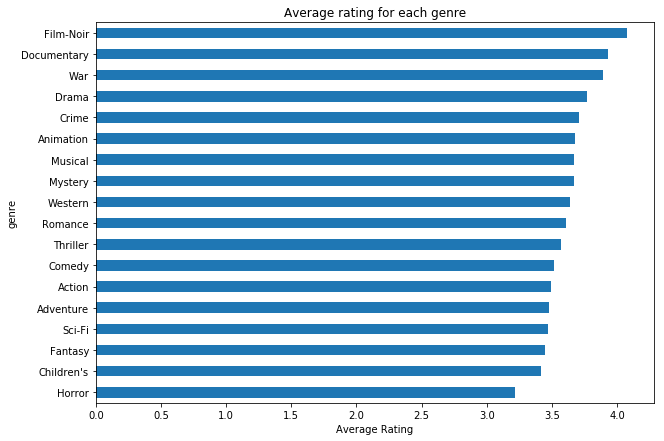

In [46]:
df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
for genre in genres_unique.genre:
    row = [genre, round(df_final[df_final[genre]==True][['rating']].mean(), 2).to_string()[6:]]
    df_temp.loc[len(df_temp)] = row
df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,7))
plot_fig.set_title('Average rating for each genre')
plot_fig.set_xlabel('Average Rating');

We can see that genre Fil-Noir is having high average rating(very less in number) followed by Documentary, War and so on. Horror is having lowest avrage rating among all genres.

We can see the average rating by each gender.

In [47]:
print(round(df_final.groupby(['gender'])['rating'].mean(), 2))

gender
F    3.62
M    3.57
Name: rating, dtype: float64


We can observe that the average rating by men and women are similar with women have slightly higher rating.

Now let's have a comparison of rating of male and female for each genre.

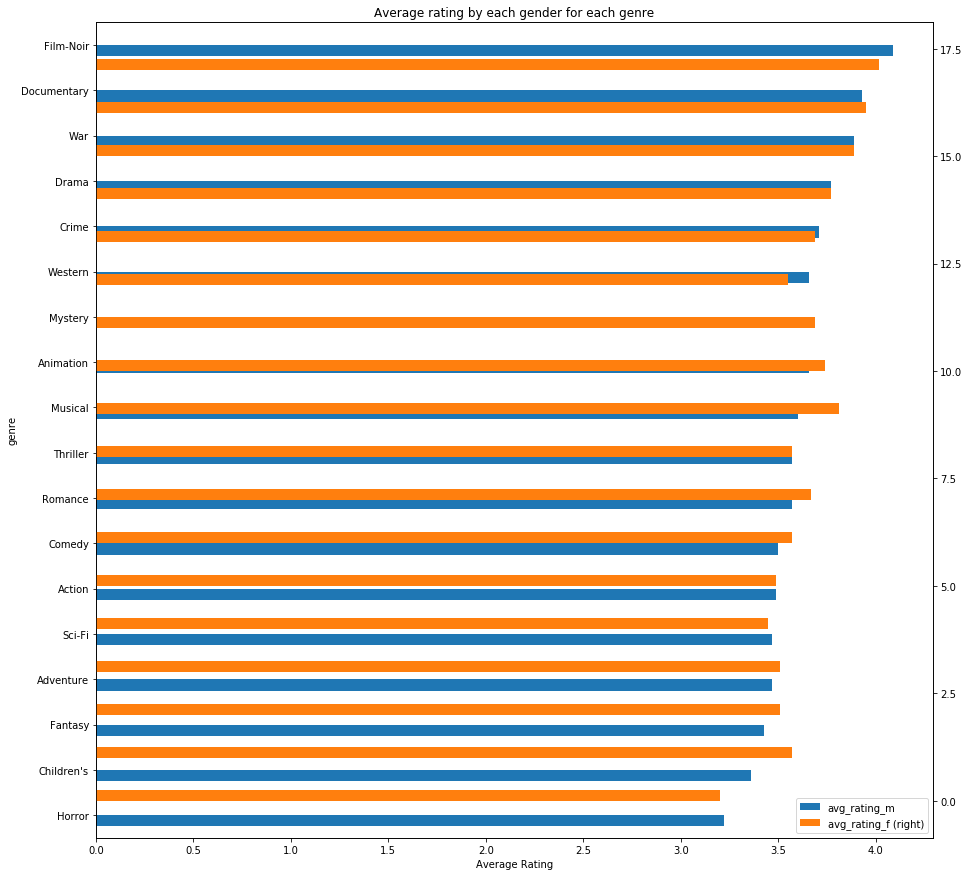

In [48]:
df_temp = pd.DataFrame(columns=['genre', 'avg_rating_m', 'avg_rating_f'])
for genre in genres_unique.genre:
    rating_m = round(df_final[(df_final[genre]==True) & (df_final['gender']=='M')][['rating']].mean(), 2).to_string()[6:]
    rating_f = round(df_final[(df_final[genre]==True) & (df_final['gender']=='F')][['rating']].mean(), 2).to_string()[6:]
    row = [genre, rating_m, rating_f]
    df_temp.loc[len(df_temp)] = row
    
cols = ['avg_rating_m', 'avg_rating_f']
df_temp[cols] = df_temp[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_temp = df_temp.sort_values('avg_rating_m', ascending=True).set_index('genre')
plot_fig = df_temp.plot( kind= 'barh' , secondary_y= 'avg_rating_f', figsize=(15,15))
plot_fig.set_title('Average rating by each gender for each genre')
plot_fig.set_xlabel('Average Rating');

We can see that there is no much difference in the average rating of men and women for different genres. Now, let's see how the average rating varies across age groups.

In [49]:
print(round(df_final.groupby(['age'])['rating'].mean(), 2))

age
1     3.55
18    3.51
25    3.55
35    3.62
45    3.64
50    3.71
56    3.77
Name: rating, dtype: float64


We can see a slight positive trend when going from lower to higher age groups. Now let's have a look at the distribution of rating per age group.

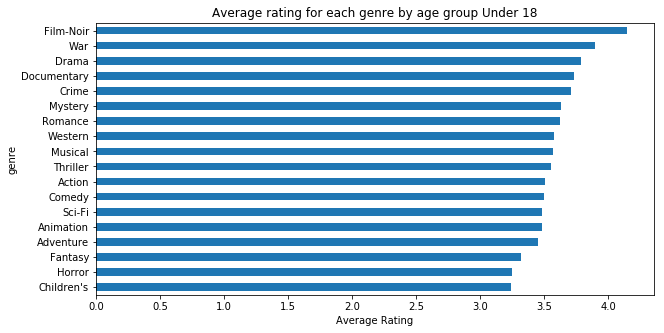

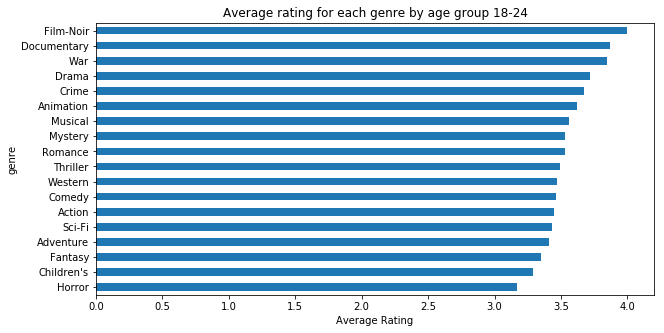

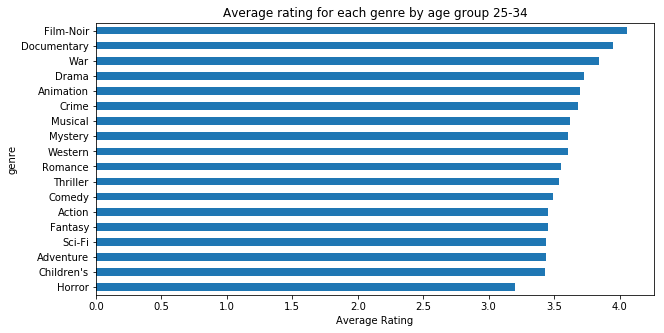

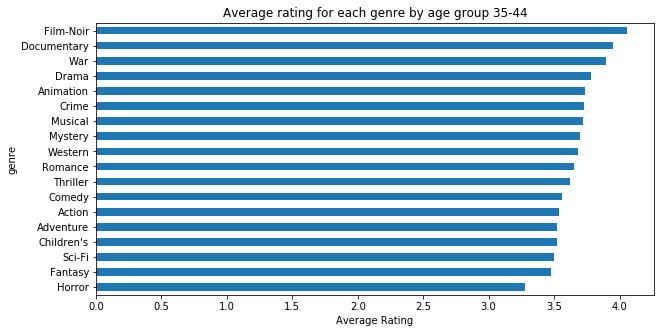

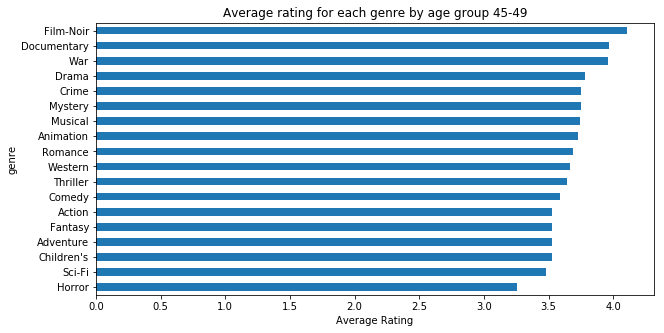

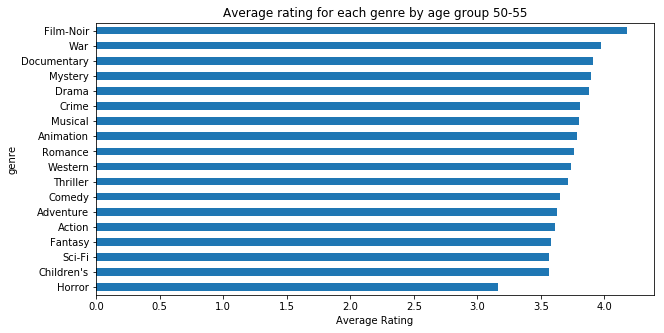

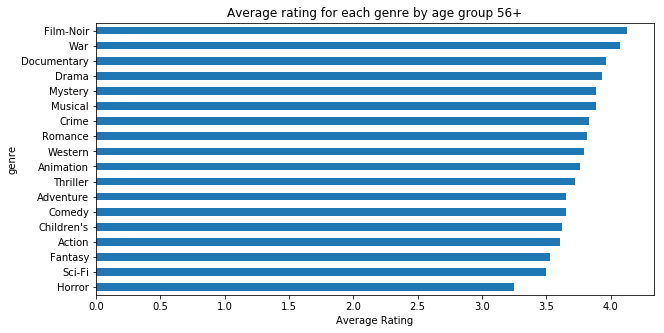

In [50]:
for age in sorted(df_user.age.unique()):
    df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
    df_final_temp = df_final[df_final['age']==age]
    for genre in genres_unique.genre:
        row = [genre, round(df_final_temp[df_final_temp[genre]==True][['rating']].mean(), 2).to_string()[6:]]
        df_temp.loc[len(df_temp)] = row
    df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
    df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
    plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,5))
    plot_fig.set_title('Average rating for each genre by age group %s'%age_group_dict[age])
    plot_fig.set_xlabel('Average Rating')
    plt.show()

We can see that irrespective of the age group, the average review of genre Film-Noir is high. There is an interesting observation that for the under age 18 group(that is for children), the average rating of children's movies is the lowest! Genre Horror is having less than overall average(approximately 3.6) rating across all age group.

Let's see how the average rating across different occupation

In [51]:
df_temp = pd.DataFrame(columns=['occupation', 'avg_rating'])
for occ in occupation_dict.keys():
    row = [occupation_dict[occ], round(df_final[df_final['occupation'] == occ]['rating'].mean(), 2)]
    df_temp.loc[len(df_temp)] = row
df_temp = df_temp.sort_values('avg_rating', ascending=False).reset_index(drop=True)
df_temp

,occupation,avg_rating
0,retired,3.78
1,scientist,3.69
2,clerical/admin,3.66
3,doctor/health care,3.66
4,homemaker,3.66
5,programmer,3.65
6,sales/marketing,3.62
7,lawyer,3.62
8,technician/engineer,3.61
9,self-employed,3.60


Retired persons tend to give slightly higher rating compared to others followed by scientists, clerics, doctors etc. Now let's have a look at the distribution of rating for each occupation type.

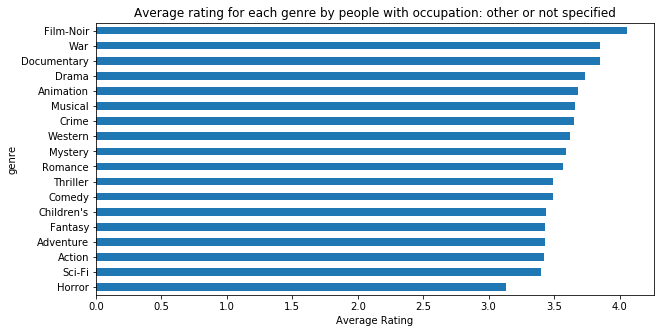

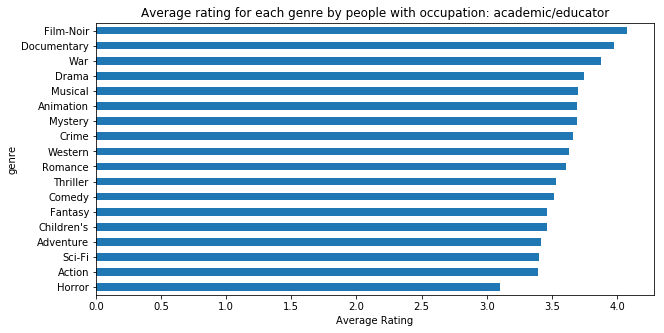

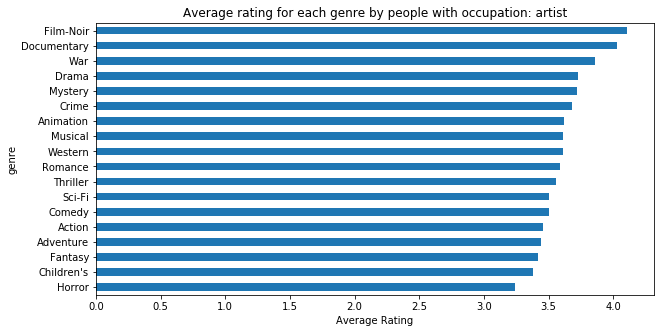

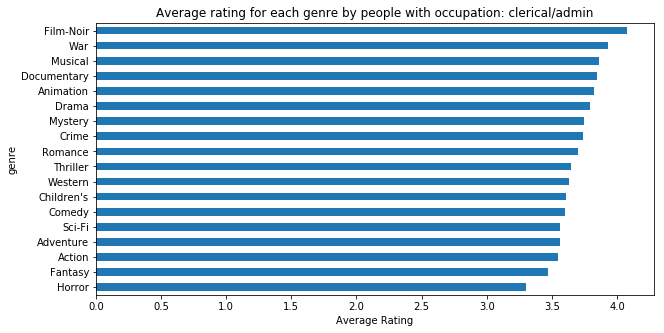

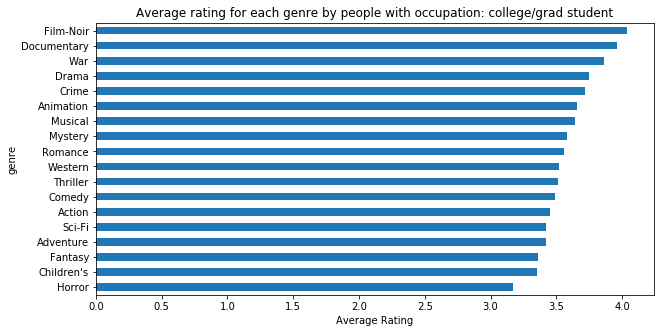

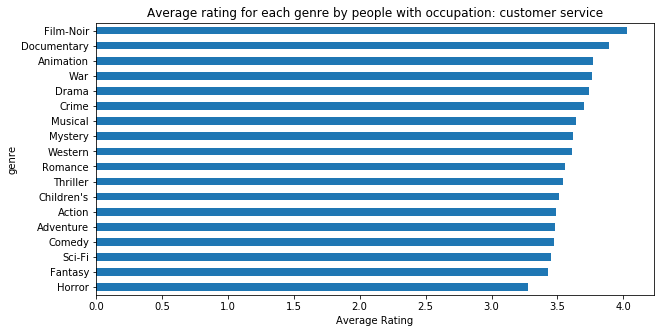

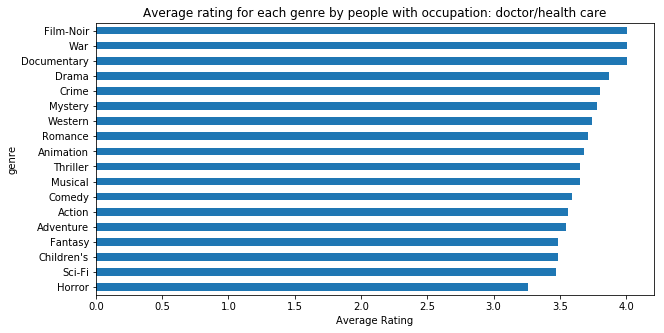

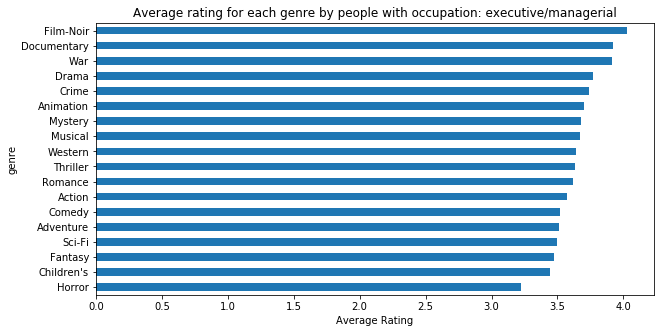

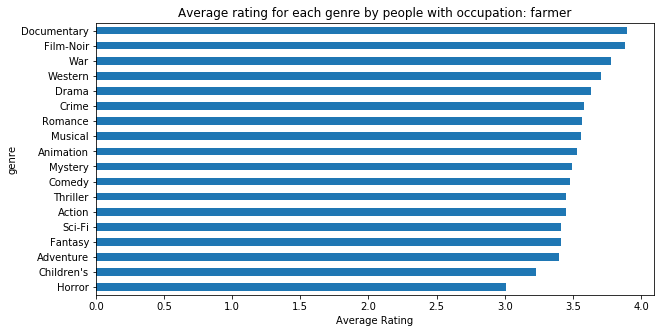

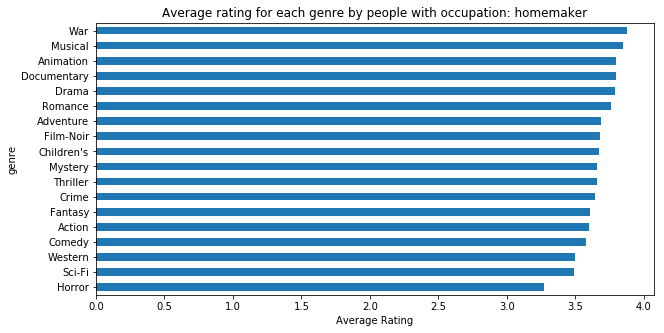

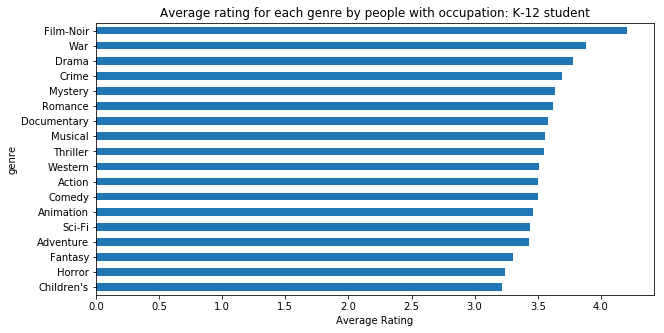

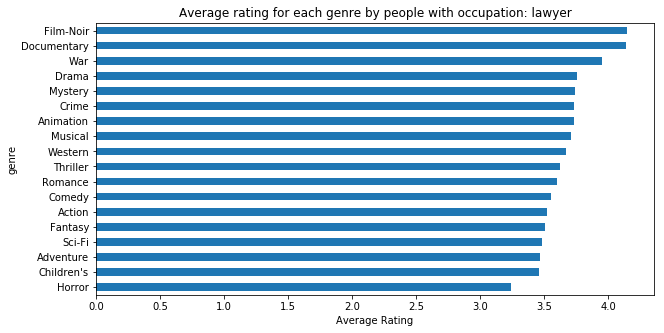

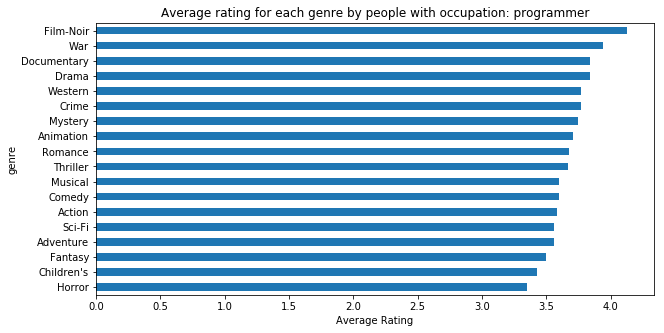

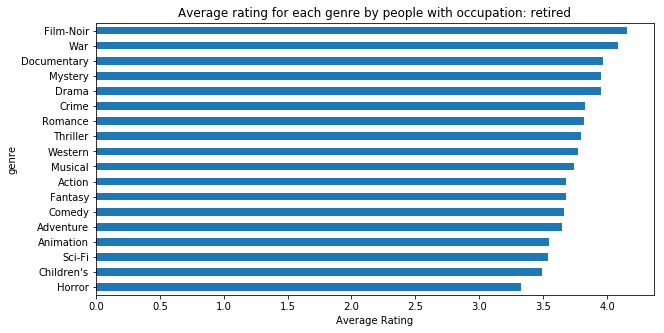

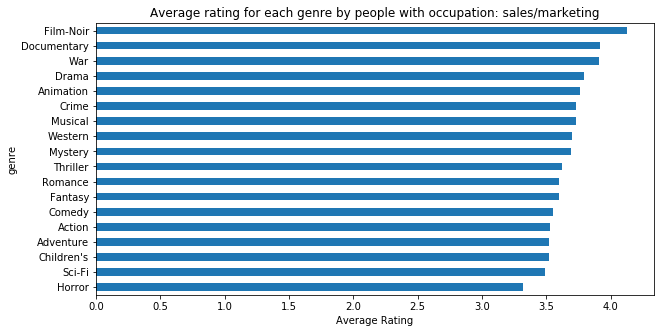

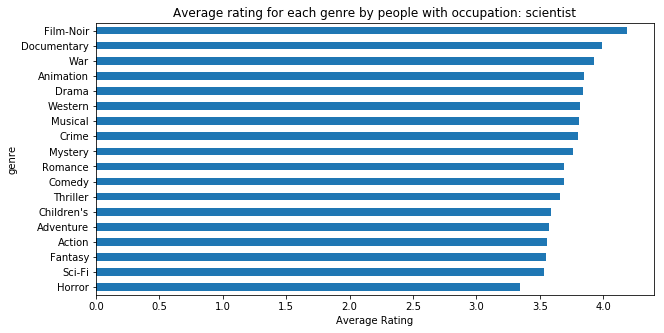

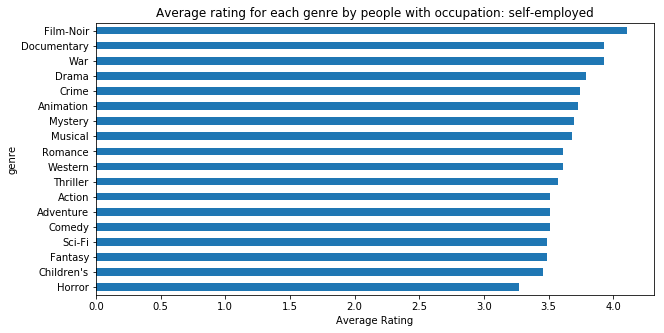

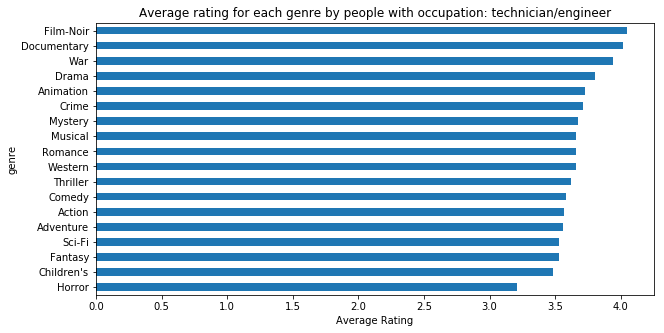

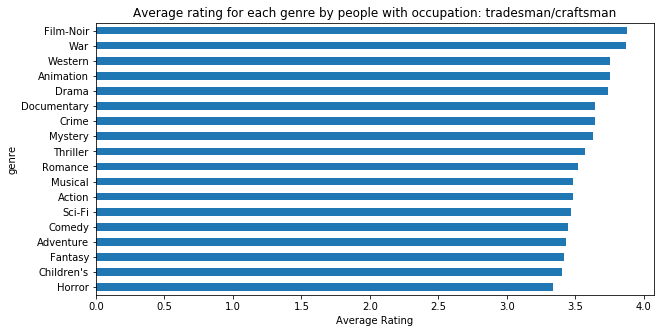

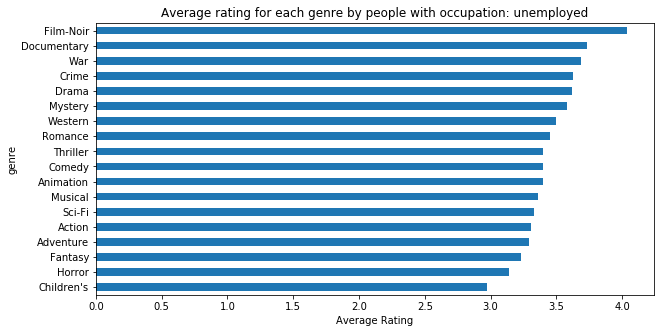

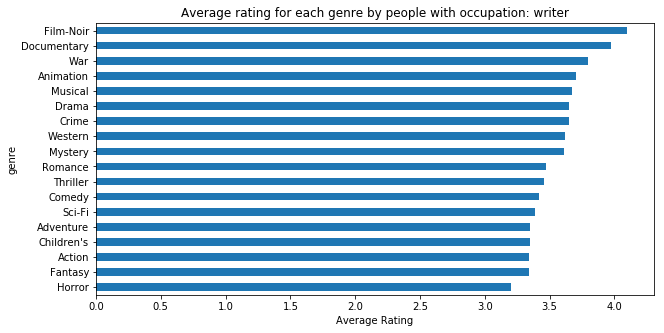

In [52]:
for occ in sorted(df_user.occupation.unique()):
    df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
    df_final_temp = df_final[df_final['occupation']==occ]
    for genre in genres_unique.genre:
        row = [genre, round(df_final_temp[df_final_temp[genre]==True][['rating']].mean(), 2).to_string()[6:]]
        df_temp.loc[len(df_temp)] = row
    df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
    df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
    plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,5))
    plot_fig.set_title('Average rating for each genre by people with occupation: %s'%occupation_dict[occ])
    plot_fig.set_xlabel('Average Rating')
    plt.show()

We can see that genre Film-noir come on top across all occupation type except for farmers and homemakers. Now let's see rating of each genre over the time.

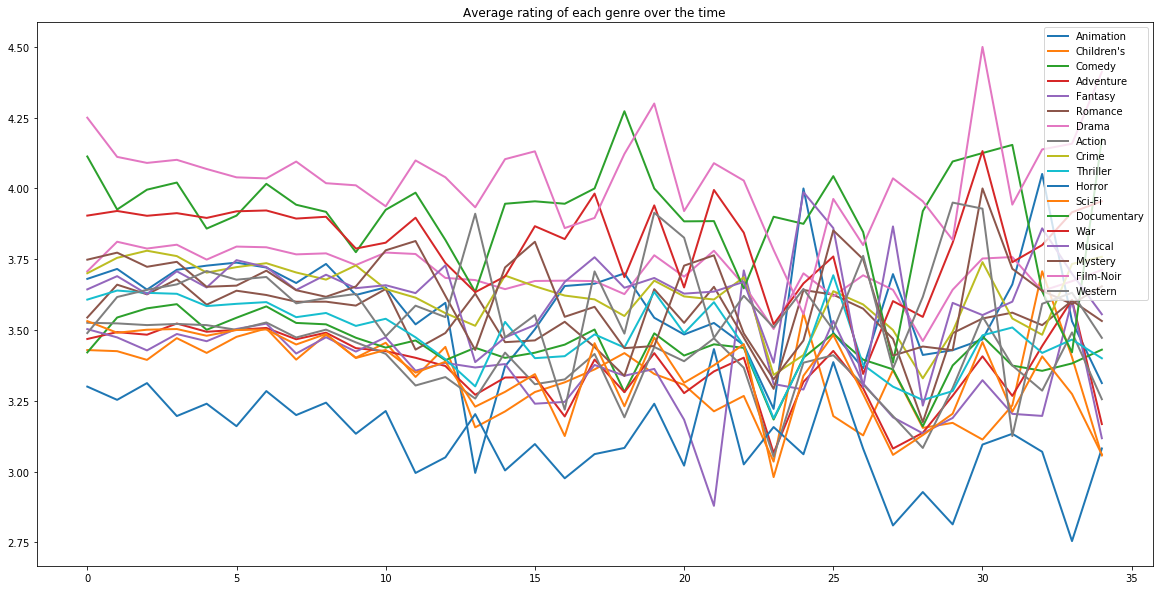

In [53]:
plt.figure(figsize=(20,10)) 
for genre in genres_unique.genre:
    df_temp = df_final[df_final[genre]==True][['year', 'month', 'rating']]
    df_temp = df_temp.groupby(['year', 'month'])['rating'].agg([np.mean]).reset_index()
    plt.plot(df_temp['mean'], linewidth=2.0, label=genre)
plt.title('Average rating of each genre over the time')
plt.legend()
plt.show()

We can see that genres Film-Noir and Horror vonsistently have high and low average ratings. We can also observe some extreme values. Now we can draw density plot for ratings per genre.

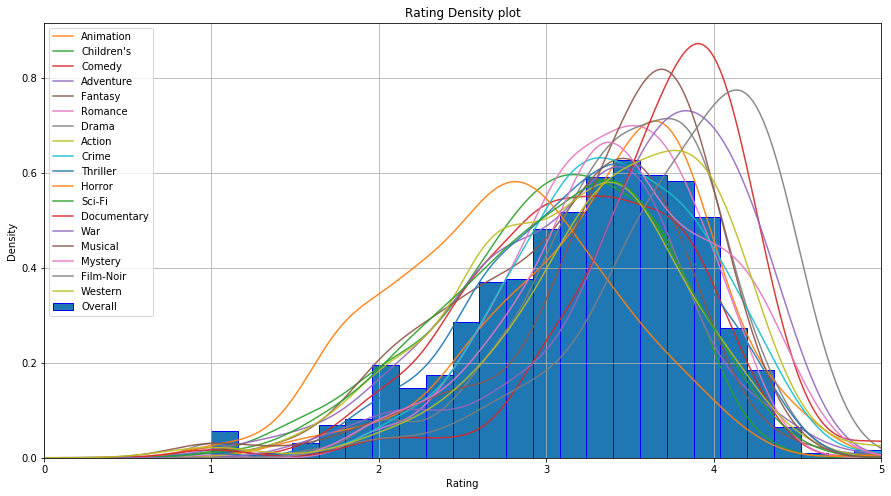

In [54]:
df_temp = df_final[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres_unique.genre:
    df_temp = df_final[df_final[genre]==True][['movie_id','rating']].groupby('movie_id').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()

We can see that all genres possess a left-skewed distribution(with a mean around 3.5), except Horror genre because of low rating.